## Objective:

Develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan. Data for the case is available in CSV format having 6362620 rows and 10 columns.

### Table of Contents

1. [**Importing the Libraries**](#chapter1)

2. [**Loading the dataset**](#chapter2)

3. [**Analysis of Data**](#chapter3)

4. [**Data Preprocessing**](#chapter4)

5. [**Exploratory Data Analysis (EDA)**](#chapter5)

6. [**Outlier Detection**](#chapter6)

7. [**Multi-collinearity**](#chapter7)

8. [**Encoding**](#chapter8)

9. [**Splitting the dataset**](#chapter9)

10. [**Training the model**](#chapter10)

11. [**Model Performance Evaluation**](#chapter11)

12. [**Feature Importance**](#chapter12)

13. [**Conclusion**](#chapter13)

14. [**Answers to Questions**](#chapter14)

### 1. Importing Libraries <a class="anchor" id="chapter1"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. Loading Dataset <a class="anchor" id="chapter2"></a>

### Data Dictionary

**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction

**oldbalanceOrg** - initial balance before the transaction

**newbalanceOrig** - new balance after the transaction

**nameDest** - customer who is the recipient of the transaction

**oldbalanceDest** - initial balance recipient before the transaction. Note that there is no information for customers that start with M (Merchants).

**newbalanceDest** - new balance recipient after the transaction. Note that there is no information for customers that start with M (Merchants).

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [31]:
df = pd.read_csv('D:/Fraud.csv')

df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## 3. Analysis of Data <a class="anchor" id="a1"></a> <a class="anchor" id="chapter3"></a>

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.shape

(6362620, 11)

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

We can see there are no missing values in the dataset.

In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [3]:
df[df['amount']==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


All transactions which contain 'amount'=0 , are fraud transactions.
Its obvious that if someone has no amount in their account, then there is no sense to transfer money.

In [4]:
df[(df['amount']==df['oldbalanceOrg']) & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


If 'amount'=='oldbalanceOrg',i.e., if customer transfer/cash_out all the amount from their account, then there is a high probability that it is a Fraud Transaction.

## 4. Preprocessing <a class="anchor" id="chapter4"></a>

From the data dictionary, we can see that we have two types of accounts: 'C' meaning Customer and 'M' meaning Merchant.

Creating a new column the indicates the type of origin and destination account

In [3]:
df['typeOrigAcc'] = df['nameOrig'].str[0]
df['typeDestAcc'] = df['nameDest'].str[0]

df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,typeOrigAcc,typeDestAcc
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,C,M
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,C,M
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,C,C
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,C,C
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,C,M
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,C,M
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,C,M
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,C,M
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,C,M
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,C,C


Checking the number of Customer and Merchant Accounts

In [11]:
df['typeOrigAcc'].value_counts()

C    6362620
Name: typeOrigAcc, dtype: int64

In [12]:
df['typeDestAcc'].value_counts()

C    4211125
M    2151495
Name: typeDestAcc, dtype: int64

We can see that there are only Customer Origin Accounts and no Merchant origin accounts. Hence, it would be okay to remove the columns which are not relevant.

In [4]:
# Making a copy of dataset

df2 = df.copy()
df2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,typeOrigAcc,typeDestAcc
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,C,M
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,C,M
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,C,C
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,C,C
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,C,M


In [5]:
df2 = df2.drop(['typeOrigAcc','nameOrig'], axis=1)

df2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,typeDestAcc
0,1,PAYMENT,9839.64,170136.0,160296.36,M1979787155,0.0,0.0,0,0,M
1,1,PAYMENT,1864.28,21249.0,19384.72,M2044282225,0.0,0.0,0,0,M
2,1,TRANSFER,181.00,181.0,0.00,C553264065,0.0,0.0,1,0,C
3,1,CASH_OUT,181.00,181.0,0.00,C38997010,21182.0,0.0,1,0,C
4,1,PAYMENT,11668.14,41554.0,29885.86,M1230701703,0.0,0.0,0,0,M


In [17]:
# Getting the percentage of fraud transactions

non_fraud = len(df2[df2.isFraud == 0])
fraud = len(df2[df2.isFraud == 1])
non_fraud_pct = round((non_fraud / (fraud + non_fraud)) * 100, 2)
fraud_pct = round((fraud / (fraud + non_fraud)) * 100, 2)

print("Number of Legit transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {} %".format(non_fraud_pct))
print("Percentage of Fraud transactions: {} %".format(fraud_pct))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.87 %
Percentage of Fraud transactions: 0.13 %


We can see that are a very low percentage of transactions are fraud.

Lets see how many Fraud transactions were flagged.

In [22]:
flagged_fraud = len(df2[df2.isFlaggedFraud==1])
flag_pct = round((df2['isFlaggedFraud'][df2.isFlaggedFraud == 1].count()/df2['isFraud'][df2.isFraud == 1].count()) * 100,2)

print("Number of Legit transactions: ", flagged_fraud)
print('Percentage of the fraud transactions that were flagged: {}%.'.format(flag_pct))

Number of Legit transactions:  16
Percentage of the fraud transactions that were flagged: 0.19%.


We can see that the percentage of Fraud transactions that we flagged by the model is extremely low. 

<br><br>
It's necessary to check how many of the fraudulent transactions were sent to the Merchant account (Account number starts with M).

In [45]:
df2[(df2['nameDest'].str[0] == 'M') & (df2['isFraud'] == 1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,typeOrigAcc,typeDestAcc


In [50]:
X = df2[df2['nameDest'].str.contains('M')]
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,typeDestAcc
0,1,PAYMENT,9839.64,170136.0,160296.36,M1979787155,0.0,0.0,0,0,M
1,1,PAYMENT,1864.28,21249.0,19384.72,M2044282225,0.0,0.0,0,0,M
4,1,PAYMENT,11668.14,41554.0,29885.86,M1230701703,0.0,0.0,0,0,M
5,1,PAYMENT,7817.71,53860.0,46042.29,M573487274,0.0,0.0,0,0,M
6,1,PAYMENT,7107.77,183195.0,176087.23,M408069119,0.0,0.0,0,0,M


No fraud transactions were made to the 'Merchant' accounts. We can conclude that in the case of fraud transaction, the account receiving money won't be a Merchant account. Also, for merchants there is no information regarding the attribites oldbalanceDest and newbalanceDest.

<br><br>
We can replace 'typeDestAccount' column with column indicating if the destination account is Customer account by '1' else '0'.

In [66]:
df2.dtypes

step                int64
type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
typeDestAcc        object
dtype: object

In [6]:
df2.loc[df2['typeDestAcc'] == 'C', 'CustomerDestAcc'] = 1
df2.loc[df2['typeDestAcc'] == 'M', 'CustomerDestAcc'] = 0
df2 = df2.drop('typeDestAcc', axis=1)
df2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CustomerDestAcc
0,1,PAYMENT,9839.64,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0.0
2,1,TRANSFER,181.00,181.0,0.00,C553264065,0.0,0.0,1,0,1.0
3,1,CASH_OUT,181.00,181.0,0.00,C38997010,21182.0,0.0,1,0,1.0
4,1,PAYMENT,11668.14,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0.0


#### Transaction Details

In [69]:
df2[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


In [71]:
df2['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

## 5. Exploratory Data Analysis (EDA) <a class="anchor" id="chapter5"></a>

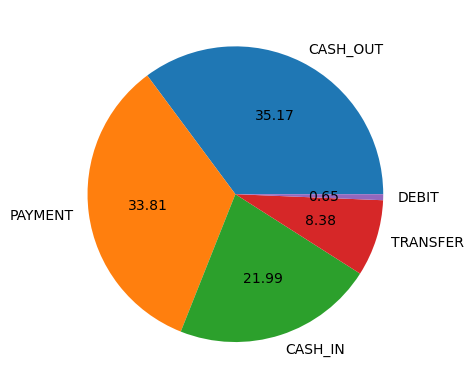

In [11]:
# Calculating individal % of each category of 'type' column in our transactions

plt.pie(x = df2['type'].value_counts(),
       autopct='%.2f',labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'])
plt.show()

Creating a new dataset which contains only fraudulent transactions

In [7]:
df2_fraudulent = df2[df2.isFraud == 1]
df2_fraudulent.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CustomerDestAcc
2,1,TRANSFER,181.0,181.0,0.0,C553264065,0.0,0.0,1,0,1.0
3,1,CASH_OUT,181.0,181.0,0.0,C38997010,21182.0,0.0,1,0,1.0
251,1,TRANSFER,2806.0,2806.0,0.0,C972765878,0.0,0.0,1,0,1.0
252,1,CASH_OUT,2806.0,2806.0,0.0,C1007251739,26202.0,0.0,1,0,1.0
680,1,TRANSFER,20128.0,20128.0,0.0,C1848415041,0.0,0.0,1,0,1.0


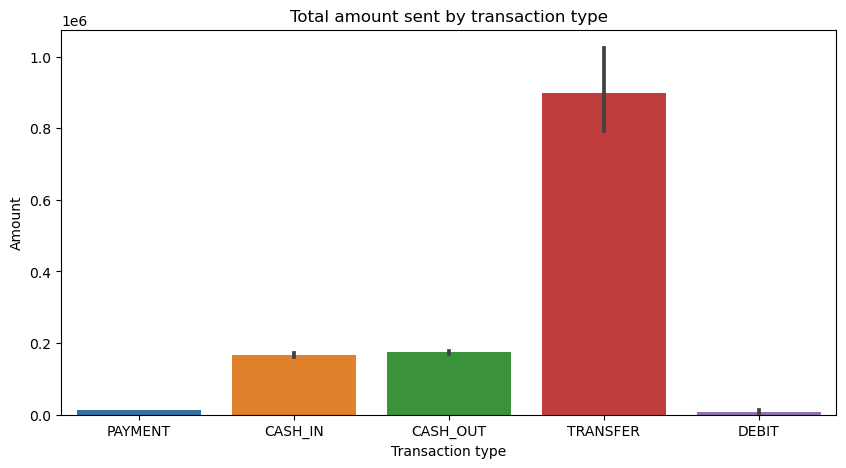

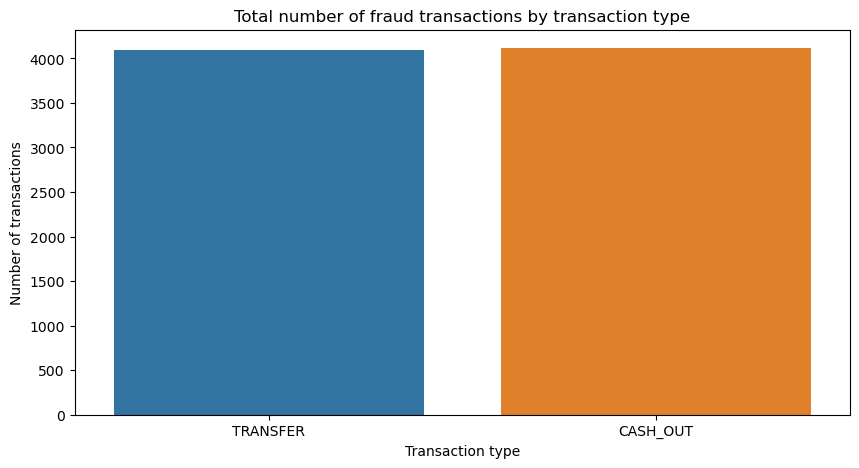

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(data = df2.sample(10000), x='type', y='amount')
plt.title('Total amount sent by transaction type')
plt.xlabel('Transaction type')
plt.ylabel('Amount');

plt.figure(figsize=(10,5))
sns.countplot(data = df2_fraudulent, x='type')
plt.title('Total number of fraud transactions by transaction type')
plt.xlabel('Transaction type')
plt.ylabel('Number of transactions');
plt.show()

From the above figures, we can see that fraudulent transactions only occur in 2 transaction types: "TRANSFER" and "CASH_OUT"

## 6. Outliers <a class="anchor" id="chapter6"></a>

<Axes: xlabel='type', ylabel='amount'>

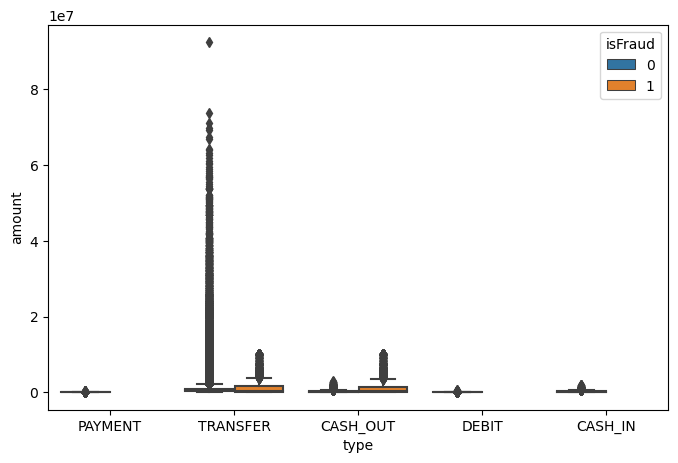

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x='type', y='amount', hue='isFraud', data=df2)

There are a lot of outliers in 'TRANSFER' type, but we cannot remove this data because many outliers are associated with Fraudulent transactions. <br>
Outliers are major factors for predicting or flagging a fraudulent transaction. Hence, the outliers are not removed.

## 7. Checking Multi-Collinearity <a class="anchor" id="chapter7"></a>

<Axes: >

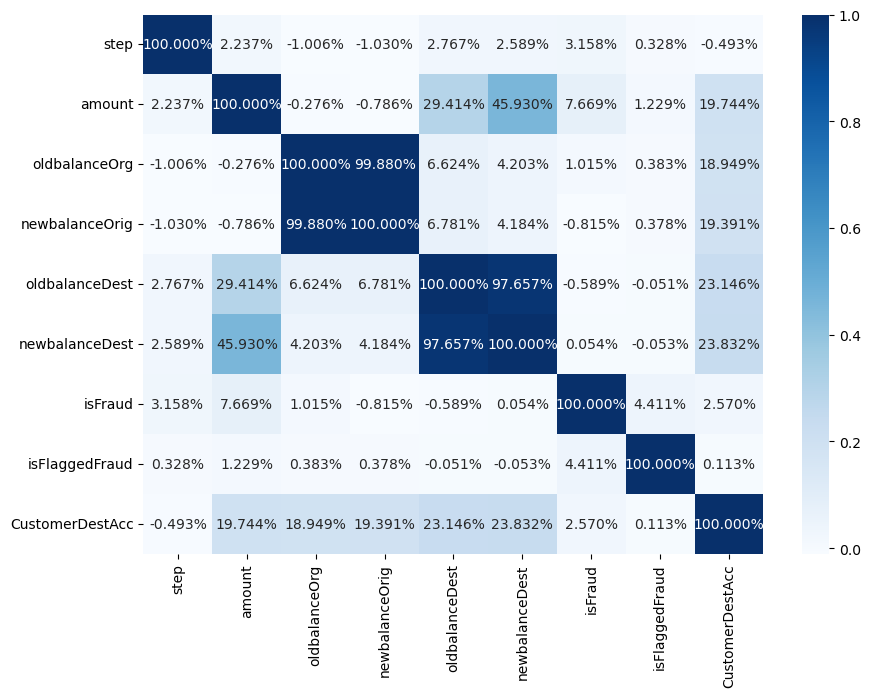

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(df2.corr(numeric_only=True), fmt='.3%', annot=True, cmap='Blues')

From Correlation graph we can conclude:
1) Their is multi_collinearity between 4 independent features
    - **oldbalanceorg** and **newbalanceorig** are highly correlated<br>
    - **oldbalanceDest** and **newbalanceDest** are highly correlated

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.87 %
Percentage of Fraud transactions: 0.13 %


<Axes: >

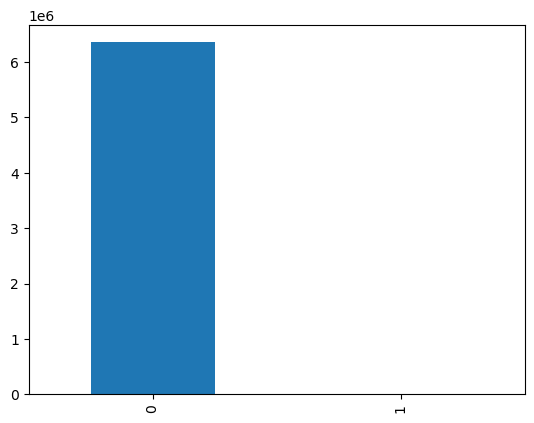

In [32]:
# Getting the percentage of fraud transactions

non_fraud = len(df2[df2.isFraud == 0])
fraud = len(df2[df2.isFraud == 1])
non_fraud_pct = round((non_fraud / (fraud + non_fraud)) * 100, 2)
fraud_pct = round((fraud / (fraud + non_fraud)) * 100, 2)

print("Number of Legit transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {} %".format(non_fraud_pct))
print("Percentage of Fraud transactions: {} %".format(fraud_pct))

df2['isFraud'].value_counts().plot(kind='bar',)

We can see that the data is highly imbalanced with 99.87% records of one class and only 0.13% of another. In this case, the accuracy metric would not be appropriate.
<br><br>
Since the datset is highly imbalanced, we take a sample of the majority class records for training.

Length of class1_df:  8213
Length of class2_df:  250000


<Axes: >

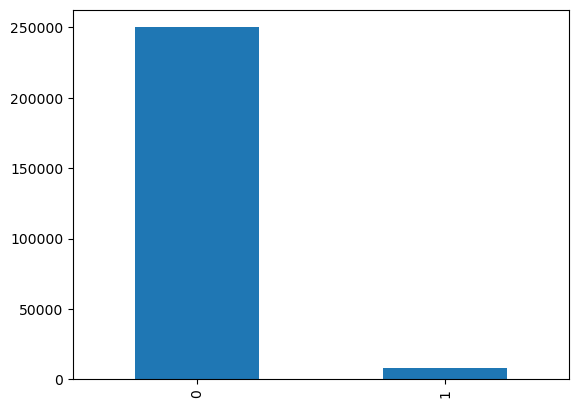

In [7]:
class1_df = df2[df2['isFraud']==1]
class0_df = df2[df2['isFraud']==0].sample(250000)

print("Length of class1_df: ",len(class1_df))
print("Length of class2_df: ",len(class0_df))

# Concatenating the two dataframes
df_new = pd.concat([class0_df,class1_df]).reset_index(drop=True)
df_new['isFraud'].value_counts().plot(kind='bar')

In [13]:
df_new.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CustomerDestAcc
0,164,CASH_OUT,17972.56,0.0,0.00,C434873205,73239.71,91212.27,0,0,1.0
1,13,CASH_OUT,14492.78,0.0,0.00,C1777369261,1350223.58,1364716.36,0,0,1.0
2,154,PAYMENT,5791.26,0.0,0.00,M1729414373,0.00,0.00,0,0,0.0
3,238,PAYMENT,7780.91,39567.0,31786.09,M534225843,0.00,0.00,0,0,0.0
4,348,CASH_OUT,84692.98,22596.0,0.00,C931267440,0.00,84692.98,0,0,1.0


In [8]:
# Dropping the non-relevant columns

df_new = df_new.drop(columns=['isFlaggedFraud','nameDest','oldbalanceDest','newbalanceOrig'], axis=1)
df_new.head()

,step,type,amount,oldbalanceOrg,newbalanceDest,isFraud,CustomerDestAcc
0,345,CASH_IN,308321.81,15485483.18,5900893.08,0,1.0
1,36,CASH_OUT,12068.76,20536.00,12068.76,0,1.0
2,346,CASH_IN,6109.38,6476614.72,290937.07,0,1.0
3,370,CASH_IN,234265.69,1813744.61,3281100.74,0,1.0
4,329,PAYMENT,12305.46,0.00,0.00,0,0.0


## 8. Encoding <a class="anchor" id="chapter8"></a>

In [9]:
# encoding the "type" column

df_new = pd.get_dummies(data=df_new, columns=['type'], prefix=['type'])
df_new.head()

,step,amount,oldbalanceOrg,newbalanceDest,isFraud,CustomerDestAcc,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,345,308321.81,15485483.18,5900893.08,0,1.0,1,0,0,0,0
1,36,12068.76,20536.00,12068.76,0,1.0,0,1,0,0,0
2,346,6109.38,6476614.72,290937.07,0,1.0,1,0,0,0,0
3,370,234265.69,1813744.61,3281100.74,0,1.0,1,0,0,0,0
4,329,12305.46,0.00,0.00,0,0.0,0,0,0,1,0


In [10]:
## Assigning the input and output variables

# Input features
X = df_new.drop('isFraud', axis=1)

# Output feature
y = df_new['isFraud']

print(X.shape)
print(y.shape)

(258213, 10)
(258213,)


In [11]:
## Scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [12]:
# Scaling the data
X = scaler.fit_transform(X)

## 9. Train Test Split <a class="anchor" id="chapter9"></a>

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print("x-train :- ", X_train.shape)
print("x-test :-  ",  X_test.shape)
print("y-train :- ", y_train.shape)
print("y-test :-  ",  y_test.shape)

x-train :-  (206570, 10)
x-test :-   (51643, 10)
y-train :-  (206570,)
y-test :-   (51643,)


## 10. Training the Model <a class="anchor" id="chapter10"></a>

In [15]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [16]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]
model_name=["Logistic Regression","Decision Tree","Random Forest","K-Nearest Neighbors"]

In [17]:
from sklearn.metrics import f1_score

model_scores=[]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_scores.append(f1_score(y_test,y_pred))

In [18]:
# Checking the f1 scores of the models

for i in range(len(model_name)):
    print(model_name[i],str(":"),model_scores[i])

Logistic Regression : 0.6101967081493377
Decision Tree : 0.911044776119403
Random Forest : 0.9318818040435459
K-Nearest Neighbors : 0.8529886914378029


From the above models, Random Forest Classifier has the highest f1 score. So, we will select Random Forest algorithm to build our model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

# Creating the hyperparameter grid
model_2 = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [5,6,7,8],
    'criterion' :['entropy']
}

# Instantiating RandomizedSearchCV object
tree_cv = GridSearchCV(estimator=model_2, param_grid=param_grid, cv = 3,scoring='f1')
 
tree_cv.fit(X_train,y_train)
 
# Print the tuned parameters and score
print("Tuned RandomForest Parameters: {}".format(tree_cv.best_params_))
print("F1 score is {}".format(tree_cv.best_score_))

y_pred = tree_cv.predict(X_test)

In [21]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
y_pred = model.predict(X_test)

## 11. Model Performance Evalution<a class="anchor" id="a3"></a><a class="anchor" id="chapter11"></a>

In [30]:
from sklearn.metrics import classification_report,roc_auc_score

print('Random Forest Classifier scores')
print(classification_report(y_test, y_pred))
print('ROC AUC Score')
print(roc_auc_score(y_test, y_pred))

Random Forest Classifier scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49973
           1       0.97      0.89      0.93      1670

    accuracy                           1.00     51643
   macro avg       0.98      0.95      0.96     51643
weighted avg       1.00      1.00      1.00     51643

ROC AUC Score
0.9465357340868259


In [24]:
from sklearn.metrics import f1_score

score = f1_score(y_test,y_pred)
print("The F1 Score for the model is: ",score)

The F1 Score for the model is:  0.9302180685358257


In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

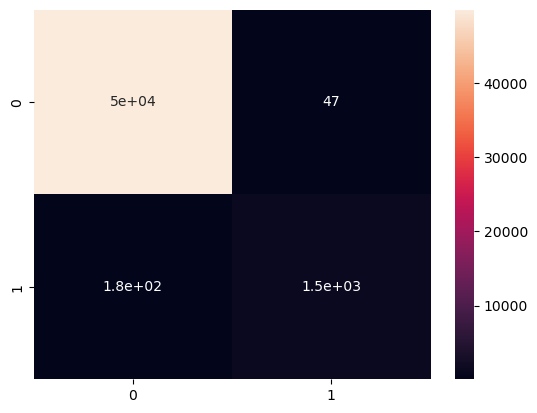

In [26]:
sns.heatmap(cm, annot = True)
plt.show()

## 12. Feature Importance <a class="anchor" id="a2"></a> <a class="anchor" id="chapter12"></a>

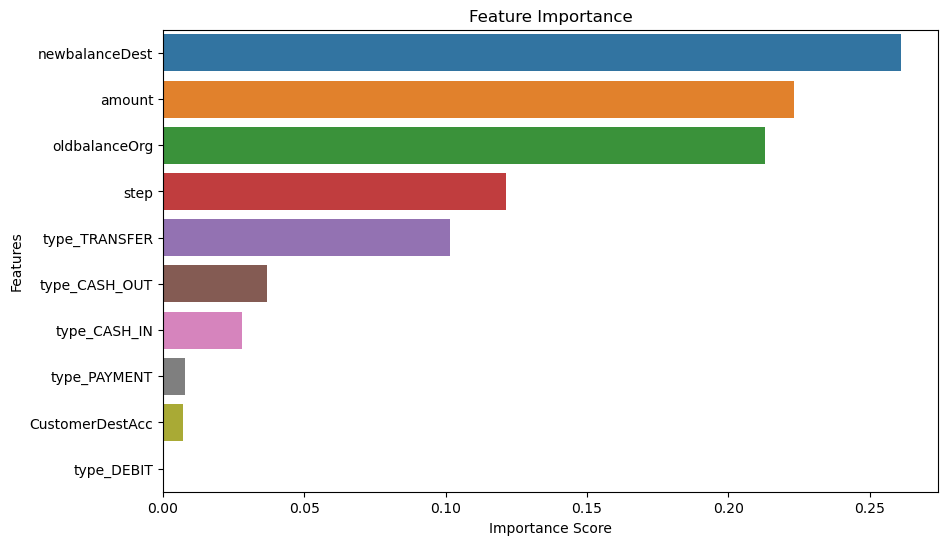

In [29]:
from sklearn.feature_selection import RFE
num_features =10
x = df_new.drop('isFraud', axis=1)
importance_scores = model.feature_importances_
selected_columns_fi = x.columns[importance_scores.argsort()[-num_features:]].tolist()
feature_importance = pd.Series(importance_scores, index=x.columns)
feature_importance = feature_importance.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

From the graph of the most important features within the model, we can observe that the most important features are **"newBalanceDest"** and **"amount"**

## 13. Conclusion <a class="anchor" id="chapter13"></a>

Here best F1 Score for Random Forest is very high, so we have selected Random Forest Classifier to build our model.

In a fraud detection model, F1 score is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly. Because of highly imbalanced data we might flag legit transactions and not flag the fraud ones. The reason why F1 Score is being used instead of accuracy, because accuracy cannot handle imbalance in the data.

## 14. Answers to the Questions <a class="anchor" id="chapter14"></a>

1) **Data cleaning including missing values, outliers and multi-collinearity.**

- Since there were no missing values in the dataset, I did not need to perform any processing steps for that. Multi-collinearity was checked for using the correlation matrix analysis. There were outliers in the dataset which were identified, but have not been removed as in our dataset, outliers are a major factor for identifying fraud transactions. [[1]](#a1)

<br>

2) **Describe your fraud detection model in elaboration.**

- This fraud detection model is based on Random Forest Classifier algorithm since the dataset was highly imbalanced and Random Forest algorithm works well with imbalanced data. Random Forest is an ensemble learning method that combines multiple decision trees to make a final prediction. When making a prediction, the final prediction is made by averaging the predictions of all the decision trees.

<br>

3) **How did you select variables to be included in the model?**

- The variables to be included in the model were selected based on domain knowledge and feature importance analysis. [[2]](#a2)

<br>

4) **Demonstrate the performance of the model by using best set of tools.**

- The performance of the model is evaluated using several metrics such as accuracy score, F1 score and confusion matrix. [[3]](#a3)

<br>

5) **What are the key factors that predict fraudulent customer?**

- The key factors that predict fraudulent customers include transaction amount, transaction type and the account balance.

<br>

6) **Do these factors make sense? If yes, How? If not, How not?**

- These factors make complete sense because they are consistent with known patterns of fraudulent activity. For example, fraudulent transactions are often for high amounts, and most of the times all of the balance is emptied from the account. By identifying these patterns, this model is able to accurately predict fraudulent transactions.

<br>

7) **What kind of prevention should be adopted while company update its infrastructure?**

- To prevent fraudulent transactions, companies can adopt several prevention measures such as implementing multifactor authentication, monitoring transactions in real-time, and implementing machine learning models to detect and flag suspicious transactions. It is also important to regularly update security protocols and educate employees and customers to follow best practices ensuring security of their data.

<br>

8) **Assuming these actions have been implemented, how would you determine if they work?**

- Initially, few transactions would have to be monitored by a human expert to determine the effectiveness of the model and preventive measures. The human expert would monitor number of flagged transactions and the number of false positives generated by the model. This feedback would be used to improvise the model and eventually improve the efficiency of the model.